In [2]:
df = pd.read_excel('results/llm_results_zero_shot_hint.xlsx')

In [3]:
df.head()

,Unnamed: 0,question_id,gemini_1.5_Flash,chatgpt_4mini
0,0,717,SELECT p.power_name FROM superhero s JOIN hero...,SELECT sp.power_name FROM superpower sp JOIN h...
1,1,718,SELECT COUNT(*) FROM superhero s JOIN hero_pow...,SELECT COUNT(DISTINCT hp.hero_id) FROM hero_po...
2,2,719,SELECT COUNT(*) FROM superhero JOIN hero_power...,SELECT COUNT(DISTINCT hp.hero_id) FROM hero_po...
3,3,720,SELECT superhero.full_name FROM superhero JOIN...,SELECT s.full_name FROM superhero s JOIN hero_...
4,4,721,SELECT COUNT(*) FROM superhero JOIN colour ON ...,SELECT COUNT(DISTINCT s.id) FROM superhero s J...


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.head()

,question_id,gemini_1.5_Flash,chatgpt_4mini
0,717,SELECT p.power_name FROM superhero s JOIN hero...,SELECT sp.power_name FROM superpower sp JOIN h...
1,718,SELECT COUNT(*) FROM superhero s JOIN hero_pow...,SELECT COUNT(DISTINCT hp.hero_id) FROM hero_po...
2,719,SELECT COUNT(*) FROM superhero JOIN hero_power...,SELECT COUNT(DISTINCT hp.hero_id) FROM hero_po...
3,720,SELECT superhero.full_name FROM superhero JOIN...,SELECT s.full_name FROM superhero s JOIN hero_...
4,721,SELECT COUNT(*) FROM superhero JOIN colour ON ...,SELECT COUNT(DISTINCT s.id) FROM superhero s J...


In [9]:
df.head()

,question_id,chatgpt_4mini
0,717,SELECT sp.power_name FROM superpower sp JOIN h...
1,718,SELECT COUNT(DISTINCT hp.hero_id) as total_her...
2,719,SELECT COUNT(DISTINCT s.id) as heroes_with_sup...
3,720,SELECT s.full_name FROM superhero s JOIN hero_...
4,721,SELECT COUNT(s.id) AS superheroes_with_blue_ey...


In [10]:
df_2 = pd.merge(df, df_1, on='question_id')
df_2.head()

,question_id,chatgpt_4mini,gemini_1.5_Flash
0,717,SELECT sp.power_name FROM superpower sp JOIN h...,SELECT sp.power_name FROM superhero AS s JO...
1,718,SELECT COUNT(DISTINCT hp.hero_id) as total_her...,"SELECT COUNT(DISTINCT hp.hero_id) AS ""Count o..."
2,719,SELECT COUNT(DISTINCT s.id) as heroes_with_sup...,SELECT COUNT(DISTINCT s.id) AS count_of_super...
3,720,SELECT s.full_name FROM superhero s JOIN hero_...,SELECT s.full_name FROM superhero s JOIN hero...
4,721,SELECT COUNT(s.id) AS superheroes_with_blue_ey...,SELECT COUNT(DISTINCT s.id) AS total_superher...


In [6]:
df.to_json('results/predicted_sql_zero_shot_hint2.json', orient='records')

## Resultados

In [1]:
import tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_path = 'bird_db/superhero.sqlite'
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')

## Zero-Shot

In [2]:
predicted_sql_1 = pd.read_json('results/predicted_sql_zero_shot.json', orient='records')
zero_shot = pd.merge(predicted_sql_1, ground_truth, on='question_id')
zero_shot = zero_shot.sort_values(by='question_id').reset_index(drop=True)

In [3]:
metricas_gemini_1 = tests.mostrar_metricas(zero_shot, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_1 = tests.mostrar_metricas(zero_shot, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	55.81 %
VA:	97.67 %
VES:	55.48 %
CM:	72.52 %
Model: chatgpt_4mini
-------------------------------
EX:	51.16 %
VA:	99.22 %
VES:	52.13 %
CM:	71.80 %


## Zero-Shot with hint

In [4]:
predicted_sql_2 = pd.read_json('results/predicted_sql_zero_shot_hint.json', orient='records')
zero_shot_hint = pd.merge(predicted_sql_2, ground_truth, on='question_id')
zero_shot_hint = zero_shot_hint.sort_values(by='question_id').reset_index(drop=True)

In [5]:
metricas_gemini_2 = tests.mostrar_metricas(zero_shot_hint, 'gemini_1.5_Flash', db_path)
metricas_chatgpt_2 = tests.mostrar_metricas(zero_shot_hint, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	73.64 %
VA:	90.70 %
VES:	75.24 %
CM:	72.42 %
Model: chatgpt_4mini
-------------------------------
EX:	81.40 %
VA:	100.00 %
VES:	83.48 %
CM:	73.64 %


## Few-Shot


In [6]:
predicted_sql_3 = pd.read_json('results/predicted_sql_few_shot.json', orient='records')
few_shot = pd.merge(predicted_sql_3, ground_truth, on='question_id')
few_shot = few_shot.sort_values(by='question_id').reset_index(drop=True)

In [7]:
metricas_gemini_3 = tests.mostrar_metricas(few_shot, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_3 = tests.mostrar_metricas(few_shot, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	68.22 %
VA:	97.67 %
VES:	66.56 %
CM:	76.97 %
Model: chatgpt_4mini
-------------------------------
EX:	60.47 %
VA:	96.90 %
VES:	59.24 %
CM:	74.42 %


## Few-Shot with hint

In [8]:
predicted_sql_4 = pd.read_json('results/predicted_sql_few_shot_hint.json', orient='records')
few_shot_hint = pd.merge(predicted_sql_4, ground_truth, on='question_id')
few_shot_hint = few_shot_hint.sort_values(by='question_id').reset_index(drop=True)

In [9]:
metricas_gemini_4 = tests.mostrar_metricas(few_shot_hint, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_4 = tests.mostrar_metricas(few_shot_hint, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	82.17 %
VA:	100.00 %
VES:	80.86 %
CM:	79.60 %
Model: chatgpt_4mini
-------------------------------
EX:	75.97 %
VA:	99.22 %
VES:	75.05 %
CM:	76.48 %


# Gráficos

In [11]:
df = pd.DataFrame([{
    'EX_by_diff_simple': d['EX_by_diff']['simple'],
    'EX_by_diff_moderate': d['EX_by_diff']['moderate'],
    'EX_by_diff_challenging': d['EX_by_diff']['challenging'],
    'EX_by_diff_total': d['EX_by_diff']['total'],
    'VA_by_diff_simple': d['VA_by_diff']['simple'],
    'VA_by_diff_moderate': d['VA_by_diff']['moderate'],
    'VA_by_diff_challenging': d['VA_by_diff']['challenging'],
    'VA_by_diff_total': d['VA_by_diff']['total'],
    'VES': d['VES'],
    'CM': d['CM']
} for d in [metricas_gemini_1, metricas_chatgpt_1, metricas_gemini_2, metricas_chatgpt_2, metricas_gemini_3, metricas_chatgpt_3, metricas_gemini_4, metricas_chatgpt_4]])

In [12]:
labels = ['gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini']

In [13]:
df

,EX_by_diff_simple,EX_by_diff_moderate,EX_by_diff_challenging,EX_by_diff_total,VA_by_diff_simple,VA_by_diff_moderate,VA_by_diff_challenging,VA_by_diff_total,VES,CM
0,59.259259,63.636364,20.000000,55.813953,98.765432,100.000000,86.666667,97.674419,55.484163,72.523370
1,54.320988,54.545455,26.666667,51.162791,100.000000,100.000000,93.333333,99.224806,52.125552,71.797391
2,81.481481,66.666667,46.666667,73.643411,96.296296,81.818182,80.000000,90.697674,75.235593,72.415355
3,83.950617,75.757576,80.000000,81.395349,100.000000,100.000000,100.000000,100.000000,83.481718,73.636598
4,75.308642,63.636364,40.000000,68.217054,100.000000,90.909091,100.000000,97.674419,66.555124,76.969023
5,69.135802,60.606061,13.333333,60.465116,98.765432,93.939394,93.333333,96.899225,59.236472,74.422287
6,87.654321,78.787879,60.000000,82.170543,100.000000,100.000000,100.000000,100.000000,80.860424,79.604268
7,87.654321,72.727273,20.000000,75.968992,100.000000,100.000000,93.333333,99.224806,75.051862,76.477969


In [14]:
df = df.rename(columns={'EX_by_diff_simple': 'ex_simple', 'EX_by_diff_moderate': 'ex_moderate', 'EX_by_diff_challenging': 'ex_challenging', 'EX_by_diff_total': 'ex_total', 'VA_by_diff_simple': 'va_simple', 'va_by_diff_moderate': 'va_moderate', 'VA_by_diff_challenging': 'va_challenging', 'VA_by_diff_total': 'va_total', 'VES': 'ves', 'EM':'em', 'VA_by_diff_moderate':'va_moderate' })

In [15]:
model_column = ['gemini_zero_shot', 'chatgpt_zero_shot', 'gemini_zero_shot_hint', 'chatgpt_zero_shot_hint', 'gemini_few_shot', 'chatgpt_few_shot', 'gemini_few_shot_hint', 'chatgpt_few_shot_hint']

In [16]:
df['model'] = labels

In [17]:
prompt = ['zero_shot', 'zero_shot', 'zero_shot_hint', 'zero_shot_hint', 'few_shot', 'few_shot', 'few_shot_hint', 'few_shot_hint']

In [18]:
df['prompt'] = prompt

In [19]:
df

,ex_simple,ex_moderate,ex_challenging,ex_total,va_simple,va_moderate,va_challenging,va_total,ves,CM,model,prompt
0,59.259259,63.636364,20.000000,55.813953,98.765432,100.000000,86.666667,97.674419,55.484163,72.523370,gemini_1.5_Flash,zero_shot
1,54.320988,54.545455,26.666667,51.162791,100.000000,100.000000,93.333333,99.224806,52.125552,71.797391,chatgpt_4mini,zero_shot
2,81.481481,66.666667,46.666667,73.643411,96.296296,81.818182,80.000000,90.697674,75.235593,72.415355,gemini_1.5_Flash,zero_shot_hint
3,83.950617,75.757576,80.000000,81.395349,100.000000,100.000000,100.000000,100.000000,83.481718,73.636598,chatgpt_4mini,zero_shot_hint
4,75.308642,63.636364,40.000000,68.217054,100.000000,90.909091,100.000000,97.674419,66.555124,76.969023,gemini_1.5_Flash,few_shot
5,69.135802,60.606061,13.333333,60.465116,98.765432,93.939394,93.333333,96.899225,59.236472,74.422287,chatgpt_4mini,few_shot
6,87.654321,78.787879,60.000000,82.170543,100.000000,100.000000,100.000000,100.000000,80.860424,79.604268,gemini_1.5_Flash,few_shot_hint
7,87.654321,72.727273,20.000000,75.968992,100.000000,100.000000,93.333333,99.224806,75.051862,76.477969,chatgpt_4mini,few_shot_hint


In [20]:
ultima_columna = df.pop('prompt')
df = pd.concat([ultima_columna, df], axis=1)

In [21]:
ultima_columna = df.pop('model')
df = pd.concat([ultima_columna, df], axis=1)

In [22]:
df

,model,prompt,ex_simple,ex_moderate,ex_challenging,ex_total,va_simple,va_moderate,va_challenging,va_total,ves,CM
0,gemini_1.5_Flash,zero_shot,59.259259,63.636364,20.000000,55.813953,98.765432,100.000000,86.666667,97.674419,55.484163,72.523370
1,chatgpt_4mini,zero_shot,54.320988,54.545455,26.666667,51.162791,100.000000,100.000000,93.333333,99.224806,52.125552,71.797391
2,gemini_1.5_Flash,zero_shot_hint,81.481481,66.666667,46.666667,73.643411,96.296296,81.818182,80.000000,90.697674,75.235593,72.415355
3,chatgpt_4mini,zero_shot_hint,83.950617,75.757576,80.000000,81.395349,100.000000,100.000000,100.000000,100.000000,83.481718,73.636598
4,gemini_1.5_Flash,few_shot,75.308642,63.636364,40.000000,68.217054,100.000000,90.909091,100.000000,97.674419,66.555124,76.969023
5,chatgpt_4mini,few_shot,69.135802,60.606061,13.333333,60.465116,98.765432,93.939394,93.333333,96.899225,59.236472,74.422287
6,gemini_1.5_Flash,few_shot_hint,87.654321,78.787879,60.000000,82.170543,100.000000,100.000000,100.000000,100.000000,80.860424,79.604268
7,chatgpt_4mini,few_shot_hint,87.654321,72.727273,20.000000,75.968992,100.000000,100.000000,93.333333,99.224806,75.051862,76.477969


In [23]:
df.to_json('results/results.json', orient='records')

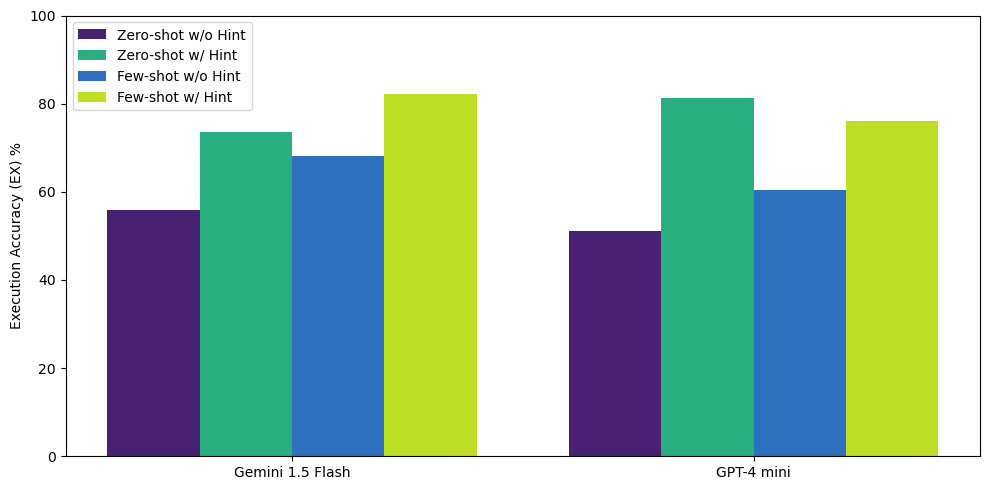

In [38]:
models = ['Gemini 1.5 Flash', 'GPT-4 mini']
conditions = ['Zero-shot w/o Hint', 'Zero-shot w/ Hint', 'Few-shot w/o Hint', 'Few-shot w/ Hint']

data = np.array([
    [df.loc[0, 'ex_total'], df.loc[2, 'ex_total'], df.loc[4, 'ex_total'], df.loc[6, 'ex_total']],  # Gemini
    [df.loc[1, 'ex_total'], df.loc[3, 'ex_total'], df.loc[5, 'ex_total'], df.loc[7, 'ex_total']],  # GPT-4 mini
])

colors = ['#482173', '#29af7f', '#2e6fbe', '#bddf26']

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Ancho de las barras y posiciones
bar_width = 0.2  # Hacer las barras más estrechas para que quepan mejor
index = np.arange(len(models))  # Indices para las etiquetas en el eje x

for i in range(len(conditions)):
    ax.bar(index + i * bar_width - bar_width /2, data[:, i], bar_width, label=conditions[i], color=colors[i % len(colors)])  # Utilizar el operador módulo para asegurarse de que el índice esté dentro del rango


# Añadir anotaciones de porcentaje encima de las barras
#for i in range(len(conditions)):
#    for j in range(len(models)):
#        ax.annotate(f"{data[j, i]:.2f}%", 
#                    (index[j] + i * bar_width - bar_width / 2, data[j, i] + 1), 
#                    ha='center', va='bottom', fontsize=9)

# Configuración de etiquetas y leyenda
ax.set_ylabel('Execution Accuracy (EX) %')
#ax.set_title('Execution Accuracy by Model and Condition')
#ax.set_xticks(index)  # Centrar etiquetas de modelos
ax.set_xticks(index + bar_width) # * (len(conditions) - 1) / 2)  # Centrar etiquetas de modelos
ax.set_xticklabels(models)

# Añadir leyenda
ax.legend(loc='upper left')

# Ajustar el límite del eje y
ax.set_ylim(0, 100)

# Ajustar los márgenes para que el gráfico no se corte
plt.tight_layout()

plt.savefig('imagen/ex_total.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()


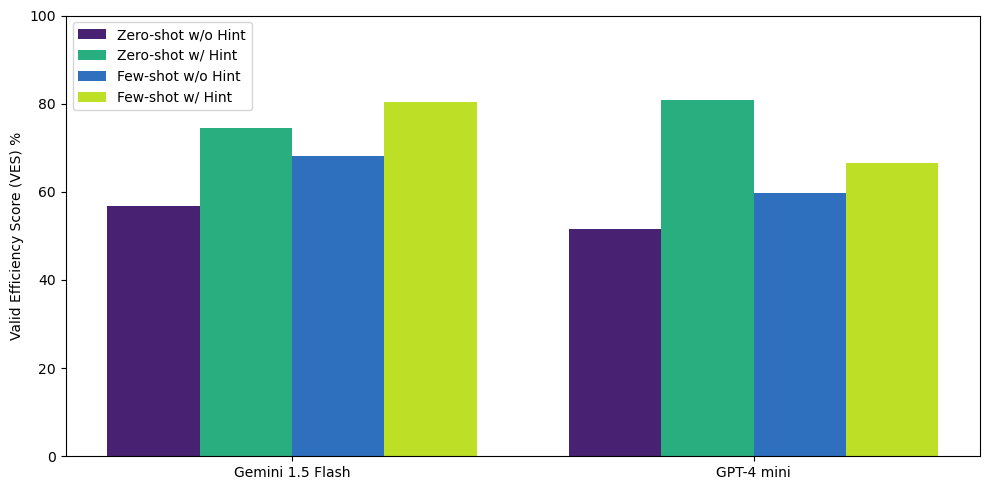

In [14]:
models = ['Gemini 1.5 Flash', 'GPT-4 mini']
conditions = ['Zero-shot w/o Hint', 'Zero-shot w/ Hint', 'Few-shot w/o Hint', 'Few-shot w/ Hint']

data = np.array([
    [df.loc[0, 'VES'], df.loc[2, 'VES'], df.loc[4, 'VES'], df.loc[6, 'VES']],  # Gemini
    [df.loc[1, 'VES'], df.loc[3, 'VES'], df.loc[5, 'VES'], df.loc[7, 'VES']],  # GPT-4 mini
])

colors = ['#482173', '#29af7f', '#2e6fbe', '#bddf26']

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Ancho de las barras y posiciones
bar_width = 0.2  # Hacer las barras más estrechas para que quepan mejor
index = np.arange(len(models))  # Indices para las etiquetas en el eje x

for i in range(len(conditions)):
    ax.bar(index + i * bar_width - bar_width /2, data[:, i], bar_width, label=conditions[i], color=colors[i % len(colors)])  # Utilizar el operador módulo para asegurarse de que el índice esté dentro del rango


# Añadir anotaciones de porcentaje encima de las barras
#for i in range(len(conditions)):
#    for j in range(len(models)):
#        ax.annotate(f"{data[j, i]:.2f}%", 
#                    (index[j] + i * bar_width - bar_width / 2, data[j, i] + 1), 
#                    ha='center', va='bottom', fontsize=9)

# Configuración de etiquetas y leyenda
ax.set_ylabel('Valid Efficiency Score (VES) %')
#ax.set_title('Execution Accuracy by Model and Condition')
#ax.set_xticks(index)  # Centrar etiquetas de modelos
ax.set_xticks(index + bar_width) # * (len(conditions) - 1) / 2)  # Centrar etiquetas de modelos
ax.set_xticklabels(models)

# Añadir leyenda
ax.legend(loc='upper left')

# Ajustar el límite del eje y
ax.set_ylim(0, 100)

# Ajustar los márgenes para que el gráfico no se corte
plt.tight_layout()

plt.savefig('imagen/ves_total.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [8]:
zero_shot.head()

,question_id,gemini_1.5_Flash,chatgpt_4mini,ground_truth,difficulty
0,717,SELECT superpower.power_name FROM superhero JO...,SELECT sp.power_name FROM superpower sp JOIN h...,SELECT T3.power_name FROM superhero AS T1 INNE...,simple
1,718,SELECT COUNT(*) FROM superhero JOIN hero_power...,SELECT COUNT(DISTINCT hp.hero_id) AS superhero...,SELECT COUNT(T1.hero_id) FROM hero_power AS T1...,simple
2,719,SELECT COUNT(*) FROM superhero s JOIN hero_pow...,SELECT COUNT(DISTINCT s.id) AS super_strength_...,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,moderate
3,720,SELECT superhero.full_name FROM superhero JOIN...,SELECT s.full_name FROM superhero s JOIN hero_...,SELECT DISTINCT T1.full_name FROM superhero AS...,simple
4,721,SELECT COUNT(DISTINCT superhero.id) AS num_sup...,SELECT COUNT(*) FROM superhero WHERE eye_colou...,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,simple


In [22]:
zero_shot_challenging = zero_shot[zero_shot['difficulty'] == 'challenging']
zero_shot_challenging = zero_shot_challenging.rename(columns={'gemini_1.5_Flash': 'gemini_zero_shot', 'chatgpt_4mini': 'gpt4_mini_zero_shot'})
zero_shot_challenging

,question_id,gemini_zero_shot,gpt4_mini_zero_shot,ground_truth,difficulty
7,724,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
13,730,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,challenging
26,743,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging
27,744,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging
43,760,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging
52,769,WITH DurabilityScores AS ( SELECT s.superhero_...,"SELECT s.superhero_name, MAX(CAST(ha.attribute...",SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
55,772,"SELECT s.superhero_name, ec.colour AS eye_colo...","SELECT c_eye.colour AS eye_colour, c_hair.colo...","SELECT T1.eye_colour_id, T1.hair_colour_id, T1...",challenging
56,773,"SELECT s.superhero_name, p.publisher_name FROM...","SELECT s.superhero_name, s.full_name, p.publis...","SELECT T1.superhero_name, T2.publisher_name FR...",challenging
58,775,WITH TotalFemaleHeroes AS ( SELECT COUNT(*) AS...,SELECT (COUNT(CASE WHEN c.colour = 'Blue' AND ...,SELECT CAST(COUNT(CASE WHEN T3.colour = 'Blue'...,challenging
71,788,WITH TotalFemaleHeroes AS ( SELECT COUNT(*) AS...,SELECT (COUNT(CASE WHEN gender_id = (SELECT id...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging


In [23]:
zero_shot_hint_challenging = zero_shot_hint[zero_shot_hint['difficulty'] == 'challenging']
zero_shot_hint_challenging = zero_shot_hint_challenging.rename(columns={'gemini_1.5_Flash': 'gemini_zero_shot_hint', 'chatgpt_4mini': 'gpt4_mini_zero_shot_hint'})
zero_shot_hint_challenging

,question_id,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,ground_truth,difficulty
7,724,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
13,730,SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero AS T1 WHE...,challenging
26,743,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging
27,744,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging
43,760,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging
52,769,SELECT superhero_name FROM superhero JOIN hero...,SELECT sh.superhero_name FROM superhero sh JOI...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
55,772,"SELECT colour.colour AS eye_colour, colour2.co...","SELECT sh.eye_colour_id, sh.hair_colour_id, sh...","SELECT T1.eye_colour_id, T1.hair_colour_id, T1...",challenging
56,773,"SELECT superhero_name, publisher_name FROM sup...","SELECT sh.superhero_name, p.publisher_name FRO...","SELECT T1.superhero_name, T2.publisher_name FR...",challenging
58,775,SELECT CAST( DIVIDE( (SELECT COUNT(*) FROM sup...,SELECT (COUNT(CASE WHEN c.colour = 'Blue' THEN...,SELECT CAST(COUNT(CASE WHEN T3.colour = 'Blue'...,challenging
71,788,SELECT ROUND( (COUNT(CASE WHEN gender = 'Femal...,SELECT (COUNT(CASE WHEN g.gender = 'Female' TH...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging


In [32]:
few_shot_challenging = few_shot[few_shot['difficulty'] == 'challenging']
few_shot_challenging = few_shot_challenging.rename(columns={'gemini_1.5_Flash': 'gemini_few_shot', 'chatgpt_4mini': 'gpt4_mini_few_shot'})
few_shot_challenging

,question_id,gemini_few_shot,gpt4_mini_few_shot,ground_truth,difficulty
7,724,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
13,730,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero AS T1 WHE...,challenging
26,743,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging
27,744,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging
43,760,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging
52,769,WITH HeroDurability AS ( SELECT s.super...,"SELECT s.superhero_name, s.full_name, ha.attri...",SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
55,772,"SELECT c1.colour AS eye_colour, c2.colour...","SELECT c_eye.colour AS eye_colour, c_hair.colo...","SELECT T1.eye_colour_id, T1.hair_colour_id, T1...",challenging
56,773,"SELECT s.superhero_name, p.publisher_name FRO...","SELECT s.superhero_name, p.publisher_name, c_e...","SELECT T1.superhero_name, T2.publisher_name FR...",challenging
58,775,WITH FemaleSuperheroes AS ( SELECT COUNT(DI...,WITH female_heroes AS ( SELECT COUNT(*) AS tot...,SELECT CAST(COUNT(CASE WHEN T3.colour = 'Blue'...,challenging
71,788,WITH FemaleHeroes AS ( SELECT COUNT(DISTINC...,WITH total_female_heroes AS ( SELECT COUNT(*) ...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging


In [35]:
few_shot_hint_challenging = few_shot_hint[few_shot_hint['difficulty'] == 'challenging']
few_shot_hint_challenging = few_shot_hint_challenging.rename(columns={'gemini_1.5_Flash': 'gemini_few_shot_hint', 'chatgpt_4mini': 'gpt4_mini_few_shot_hint'})
few_shot_hint_challenging

,question_id,gemini_few_shot_hint,gpt4_mini_few_shot_hint,ground_truth,difficulty
7,724,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
13,730,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,challenging
26,743,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging
27,744,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging
43,760,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging
52,769,WITH RankedHeroes AS ( SELECT s.superhe...,"SELECT s.superhero_name, ha.attribute_value AS...",SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
55,772,"SELECT c1.colour AS eye_colour, c2.colour...","SELECT c_eye.colour AS eye_colour, c_hair.colo...","SELECT T1.eye_colour_id, T1.hair_colour_id, T1...",challenging
56,773,"SELECT s.superhero_name, p.publisher_name FRO...","SELECT s.superhero_name, p.publisher_name FROM...","SELECT T1.superhero_name, T2.publisher_name FR...",challenging
58,775,WITH female_heroes AS ( SELECT COUNT(DISTIN...,WITH female_heroes AS ( SELECT COUNT(s.id) AS ...,SELECT CAST(COUNT(CASE WHEN T3.colour = 'Blue'...,challenging
71,788,WITH MarvelFemaleHeroes AS ( SELECT COUNT(D...,WITH total_marvel_heroes AS ( SELECT COUNT(s.i...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging


In [74]:
df_1 = pd.merge(zero_shot_challenging, zero_shot_hint_challenging, on='question_id')

In [75]:
df_2 = pd.merge(few_shot_challenging, few_shot_hint_challenging, on='question_id')

In [76]:
df_3 = pd.merge(df_1, df_2, on='question_id')

In [77]:
df_3.head()

,question_id,gemini_zero_shot,gpt4_mini_zero_shot,ground_truth_x_x,difficulty_x_x,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,ground_truth_y_x,difficulty_y_x,gemini_few_shot,gpt4_mini_few_shot,ground_truth_x_y,difficulty_x_y,gemini_few_shot_hint,gpt4_mini_few_shot_hint,ground_truth_y_y,difficulty_y_y
0,724,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,challenging
1,730,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,challenging,SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero AS T1 WHE...,challenging,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero AS T1 WHE...,challenging,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,challenging
2,743,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,challenging
3,744,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,challenging
4,760,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,challenging


In [78]:
df_3 = df_3.drop(columns=['difficulty_x_x', 'ground_truth_y_x', 'difficulty_y_x', 'ground_truth_x_y', 'difficulty_x_y', 'ground_truth_y_y', 'difficulty_y_y'])

In [79]:
df_3 = df_3.rename(columns={'ground_truth_x_x': 'ground_truth'})

In [80]:
df_3.head()

,question_id,gemini_zero_shot,gpt4_mini_zero_shot,ground_truth,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,gemini_few_shot,gpt4_mini_few_shot,gemini_few_shot_hint,gpt4_mini_few_shot_hint
0,724,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...
1,730,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe..."
2,743,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...
3,744,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...
4,760,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...


In [47]:
df_3.columns

Index(['question_id', 'gemini_zero_shot', 'gpt4_mini_zero_shot',
       'ground_truth', 'gemini_zero_shot_hint', 'gpt4_mini_zero_shot_hint',
       'gemini_few_shot', 'gpt4_mini_few_shot', 'gemini_few_shot_hint',
       'gpt4_mini_few_shot_hint'],
      dtype='object')

In [81]:
answers_challenging = df_3.reindex(columns=['question_id', 'ground_truth', 'gemini_zero_shot', 'gpt4_mini_zero_shot',
        'gemini_zero_shot_hint', 'gpt4_mini_zero_shot_hint',
       'gemini_few_shot', 'gpt4_mini_few_shot', 'gemini_few_shot_hint',
       'gpt4_mini_few_shot_hint'])

In [73]:
answers_challenging.head()

,question_id,ground_truth,gemini_zero_shot,gpt4_mini_zero_shot,ground_truth,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,gemini_few_shot,gpt4_mini_few_shot,gemini_few_shot_hint,gpt4_mini_few_shot_hint
0,724,SELECT T1.superhero_name FROM superhero AS T1 ...,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT T1.superhero_name FROM superhero AS T1 ...,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...
1,730,SELECT superhero_name FROM superhero AS T1 WHE...,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero AS T1 WHE...,SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe..."
2,743,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...
3,744,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...
4,760,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...


In [63]:
#answers_challenging = answers_challenging.drop(answers_challenging.columns[4],axis=1)

In [64]:
answers_challenging.head()

,question_id,gemini_zero_shot,gpt4_mini_zero_shot,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,gemini_few_shot,gpt4_mini_few_shot,gemini_few_shot_hint,gpt4_mini_few_shot_hint
0,724,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...
1,730,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe..."
2,743,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...
3,744,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...
4,760,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...


In [82]:
answers_challenging.to_json('results/answers.json', orient='records')

In [83]:
answer = pd.read_json('results/answers.json', orient='records')

In [84]:
answer.head()

,question_id,ground_truth,gemini_zero_shot,gpt4_mini_zero_shot,gemini_zero_shot_hint,gpt4_mini_zero_shot_hint,gemini_few_shot,gpt4_mini_few_shot,gemini_few_shot_hint,gpt4_mini_few_shot_hint
0,724,SELECT T1.superhero_name FROM superhero AS T1 ...,SELECT superhero_name FROM superhero s JOIN co...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT superhero_name FROM superhero WHERE eye...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superhero s JOIN...,SELECT s.superhero_name FROM superhero s JOIN ...
1,730,SELECT superhero_name FROM superhero AS T1 WHE...,SELECT superhero_name FROM superhero s JOIN he...,"SELECT s.superhero_name, s.full_name FROM supe...",SELECT superhero_name FROM superhero JOIN hero...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name FROM superh...,SELECT s.superhero_name FROM superhero s JOIN ...,SELECT s.superhero_name\r FROM superhero s\r ...,"SELECT s.superhero_name, s.full_name FROM supe..."
2,743,SELECT (CAST(COUNT(*) AS REAL) * 100 / (SELECT...,WITH TotalSuperheroes AS ( SELECT COUNT(*) AS ...,WITH SelfInterestedHeroes AS ( SELECT s.id FRO...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT (COUNT(CASE WHEN a.alignment = 'Bad' TH...,WITH SelfishHeroes AS ( SELECT COUNT(DI...,WITH total_superheroes AS ( SELECT COUNT(DISTI...,"WITH BadHeroes AS ( SELECT s.id, s....",WITH bad_heroes AS ( SELECT COUNT(s.id) AS tot...
3,744,SELECT SUM(CASE WHEN T2.publisher_name = 'Marv...,WITH DCSuperheroesCount AS ( SELECT COUNT(*) A...,SELECT ABS(COUNT(CASE WHEN publisher_id = (SEL...,SELECT ( SELECT COUNT(*) FROM superhero WHERE ...,SELECT ABS(COUNT(CASE WHEN p.publisher_name = ...,WITH publisher_counts AS ( SELECT p.pub...,WITH publisher_counts AS ( SELECT p.publisher_...,SELECT SUM(CASE WHEN p.publisher_name = 'Ma...,WITH publisher_counts AS ( SELECT p.publisher_...
4,760,SELECT CAST(COUNT(CASE WHEN T2.publisher_name ...,WITH TotalSuperheroes150To180 AS ( SELECT COUN...,SELECT (COUNT(CASE WHEN p.publisher_name = 'Ma...,SELECT ( SUM(CASE WHEN publisher.publisher_nam...,SELECT (COUNT(CASE WHEN publisher.publisher_na...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH height_heroes AS ( SELECT COUNT(*) AS tot...,WITH MarvelHeroes AS ( SELECT COUNT(DISTINC...,WITH filtered_heroes AS ( SELECT s.id FROM sup...


In [87]:
import sqlite3

def execution_acc(df, model, db_path):
    incorrect_ids = []  # Almacena los question_id que no coinciden
    correct_count = 0  # Contador de coincidencias

    with sqlite3.connect(db_path) as conn:
        for _, row in df.iterrows():
            predicted_sql = row[model]
            ground_truth = row['ground_truth']
            question_id = row['question_id']  # Obtén el question_id de la fila actual

            try:
                cursor = conn.cursor()
                cursor.execute(predicted_sql, ())
                predicted_res = cursor.fetchall()
                
                cursor.execute(ground_truth, ())
                ground_truth_res = cursor.fetchall()

                # Verifica si los resultados son iguales
                if set(predicted_res) == set(ground_truth_res):
                    correct_count += 1  # Cuenta como correcta
                else:
                    incorrect_ids.append(question_id)  # Almacena el ID si no coincide

            except sqlite3.Error as e:
                # Considera la predicción incorrecta en caso de error
                incorrect_ids.append(question_id)

    # Calcula y muestra la exactitud de ejecución
    execution_accuracy = correct_count / len(df) * 100
    print(f'Execution Accuracy: {execution_accuracy:.2f}%')

    return incorrect_ids


In [90]:
gemini_zero_shot_error = execution_acc(answer, 'gemini_zero_shot', db_path)
gpt4_mini_zero_shot_error = execution_acc(answer, 'gpt4_mini_zero_shot', db_path)
gemini_zero_shot_hint_error = execution_acc(answer, 'gemini_zero_shot_hint', db_path)
gpt4_mini_zero_shot_hint_error = execution_acc(answer, 'gpt4_mini_zero_shot_hint', db_path)
gemini_few_shot_error = execution_acc(answer, 'gemini_few_shot', db_path)
gpt4_mini_few_shot_error = execution_acc(answer, 'gpt4_mini_few_shot', db_path)
gemini_few_shot_hint_error = execution_acc(answer, 'gemini_few_shot_hint', db_path)
gpt4_mini_few_shot_hint_error = execution_acc(answer, 'gpt4_mini_few_shot_hint', db_path)

Execution Accuracy: 20.00%
Execution Accuracy: 26.67%
Execution Accuracy: 46.67%
Execution Accuracy: 80.00%
Execution Accuracy: 40.00%
Execution Accuracy: 13.33%
Execution Accuracy: 60.00%
Execution Accuracy: 13.33%


In [93]:
superhero_complete = pd.read_json('bird_db/superhero_complete.json', orient='records')

In [102]:
pd.set_option('display.max_colwidth', None)


In [ ]:
completo = [gemini_zero_shot_error, gpt4_mini_zero_shot_error,
            gemini_zero_shot_hint_error, gpt4_mini_zero_shot_hint_error,
            gemini_few_shot_error, gpt4_mini_few_shot_error,
            gemini_few_shot_hint_error, gpt4_mini_few_shot_hint_error]

In [119]:
coincidencias_zero_shot = set.intersection(*[set(lista) for lista in [gemini_zero_shot_error, gpt4_mini_zero_shot_error]])
print(coincidencias_zero_shot)

for index in coincidencias_zero_shot:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

{769, 835, 772, 775, 743, 819, 788, 829}
52    Which superhero has the most durability published by Dark Horse Comics?
Name: question, dtype: object
118    Among all superheroes in Marvel Comics, identify the percentage of 'good' superheroes.
Name: question, dtype: object
55    List the eyes, hair and skin colour of all female superheroes published by Dark Horse Comics.
Name: question, dtype: object
58    What is the percentage of blue female superheroes among all female superheroes?
Name: question, dtype: object
26    What is the percentage of superheroes who act in their own self-interest or make decisions based on their own moral code? Indicate how many of the said superheroes were published by Marvel Comics.
Name: question, dtype: object
102    In superheroes with missing weight data, calculate the difference between the number of superheroes with blue eyes and no eye color.
Name: question, dtype: object
71    How many percent of female heroes were published by Marvel Comics?
Name:

In [120]:
coincidencias_zero_shot_hint = set.intersection(*[set(lista) for lista in [gemini_zero_shot_hint_error, gpt4_mini_zero_shot_hint_error]])
print(coincidencias_zero_shot_hint)

for index in coincidencias_zero_shot_hint:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

{788, 743}
71    How many percent of female heroes were published by Marvel Comics?
Name: question, dtype: object
26    What is the percentage of superheroes who act in their own self-interest or make decisions based on their own moral code? Indicate how many of the said superheroes were published by Marvel Comics.
Name: question, dtype: object


In [124]:
coincidencias_few_shot = set.intersection(*[set(lista) for lista in [gemini_few_shot_error, gpt4_mini_few_shot_error]])
print(coincidencias_few_shot)

for index in coincidencias_few_shot:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

{835, 772, 743, 744, 775, 818, 819, 788, 760}
118    Among all superheroes in Marvel Comics, identify the percentage of 'good' superheroes.
Name: question, dtype: object
55    List the eyes, hair and skin colour of all female superheroes published by Dark Horse Comics.
Name: question, dtype: object
26    What is the percentage of superheroes who act in their own self-interest or make decisions based on their own moral code? Indicate how many of the said superheroes were published by Marvel Comics.
Name: question, dtype: object
27    Between DC and Marvel Comics, which publisher has published more superheroes? Find the difference in the number of superheroes they have published.
Name: question, dtype: object
58    What is the percentage of blue female superheroes among all female superheroes?
Name: question, dtype: object
101    Among the bad superheroes, what is the percentage of female superheroes?
Name: question, dtype: object
102    In superheroes with missing weight data, calculate

In [125]:
coincidencias_few_hint_shot = set.intersection(*[set(lista) for lista in [gemini_few_shot_hint_error, gpt4_mini_few_shot_hint_error]])
print(coincidencias_few_hint_shot)

for index in coincidencias_few_hint_shot:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

{769, 835, 772, 775, 788, 760}
52    Which superhero has the most durability published by Dark Horse Comics?
Name: question, dtype: object
118    Among all superheroes in Marvel Comics, identify the percentage of 'good' superheroes.
Name: question, dtype: object
55    List the eyes, hair and skin colour of all female superheroes published by Dark Horse Comics.
Name: question, dtype: object
58    What is the percentage of blue female superheroes among all female superheroes?
Name: question, dtype: object
71    How many percent of female heroes were published by Marvel Comics?
Name: question, dtype: object
43    In superheroes with height between 150 to 180, what is the percentage of heroes published by Marvel Comics?
Name: question, dtype: object


In [117]:
for index in coincidencias_zero_shot:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

52    Which superhero has the most durability published by Dark Horse Comics?
Name: question, dtype: object
118    Among all superheroes in Marvel Comics, identify the percentage of 'good' superheroes.
Name: question, dtype: object
55    List the eyes, hair and skin colour of all female superheroes published by Dark Horse Comics.
Name: question, dtype: object
58    What is the percentage of blue female superheroes among all female superheroes?
Name: question, dtype: object
26    What is the percentage of superheroes who act in their own self-interest or make decisions based on their own moral code? Indicate how many of the said superheroes were published by Marvel Comics.
Name: question, dtype: object
102    In superheroes with missing weight data, calculate the difference between the number of superheroes with blue eyes and no eye color.
Name: question, dtype: object
71    How many percent of female heroes were published by Marvel Comics?
Name: question, dtype: object
112    Which pub

In [103]:
print(superhero_complete.loc[superhero_complete['question_id'] == 788, 'question'])

71    How many percent of female heroes were published by Marvel Comics?
Name: question, dtype: object


In [126]:
preguntas = coincidencias_zero_shot | coincidencias_zero_shot_hint | coincidencias_few_shot | coincidencias_few_hint_shot
print(len(preguntas))

11


In [127]:
preguntas

{743, 744, 760, 769, 772, 775, 788, 818, 819, 829, 835}

In [128]:
for index in preguntas:
    print(superhero_complete.loc[superhero_complete['question_id'] == index, 'question'])

52    Which superhero has the most durability published by Dark Horse Comics?
Name: question, dtype: object
118    Among all superheroes in Marvel Comics, identify the percentage of 'good' superheroes.
Name: question, dtype: object
55    List the eyes, hair and skin colour of all female superheroes published by Dark Horse Comics.
Name: question, dtype: object
58    What is the percentage of blue female superheroes among all female superheroes?
Name: question, dtype: object
26    What is the percentage of superheroes who act in their own self-interest or make decisions based on their own moral code? Indicate how many of the said superheroes were published by Marvel Comics.
Name: question, dtype: object
27    Between DC and Marvel Comics, which publisher has published more superheroes? Find the difference in the number of superheroes they have published.
Name: question, dtype: object
101    Among the bad superheroes, what is the percentage of female superheroes?
Name: question, dtype: ob